##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Deploy Gemma in Vertex AI

This cookbook illustrates how you can deploy the Gemma model in [Vertex AI](https://cloud.google.com/vertex-ai).

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Gemma/Deploy_Gemma_in_Vertex_AI.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Costs

This tutorial uses billable components of Google Cloud:

- Vertex AI
- Cloud Storage

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing), [Cloud Storage pricing](https://cloud.google.com/storage/pricing), and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Setup

Find the [Gemma 2 model card](https://pantheon.corp.google.com/vertex-ai/publishers/google/model-garden/gemma2) from the Model Garden and click "DEPLOY" button.

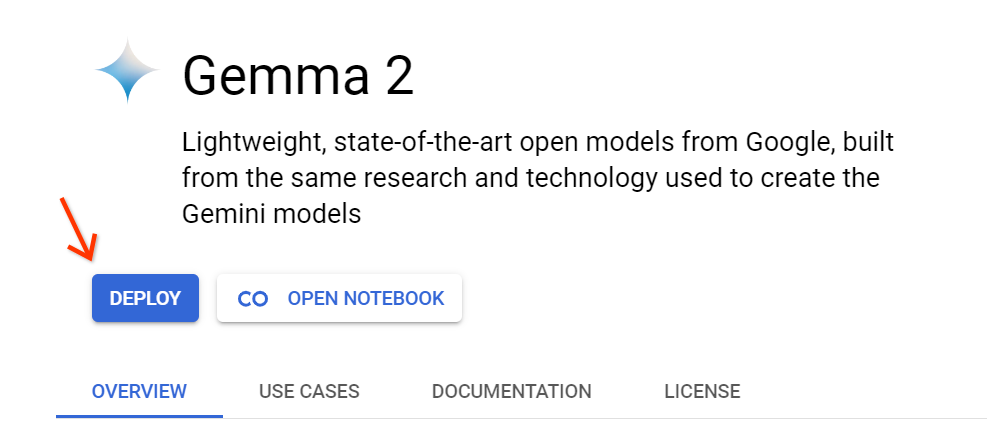

Choose the model variation and the location to deploy.

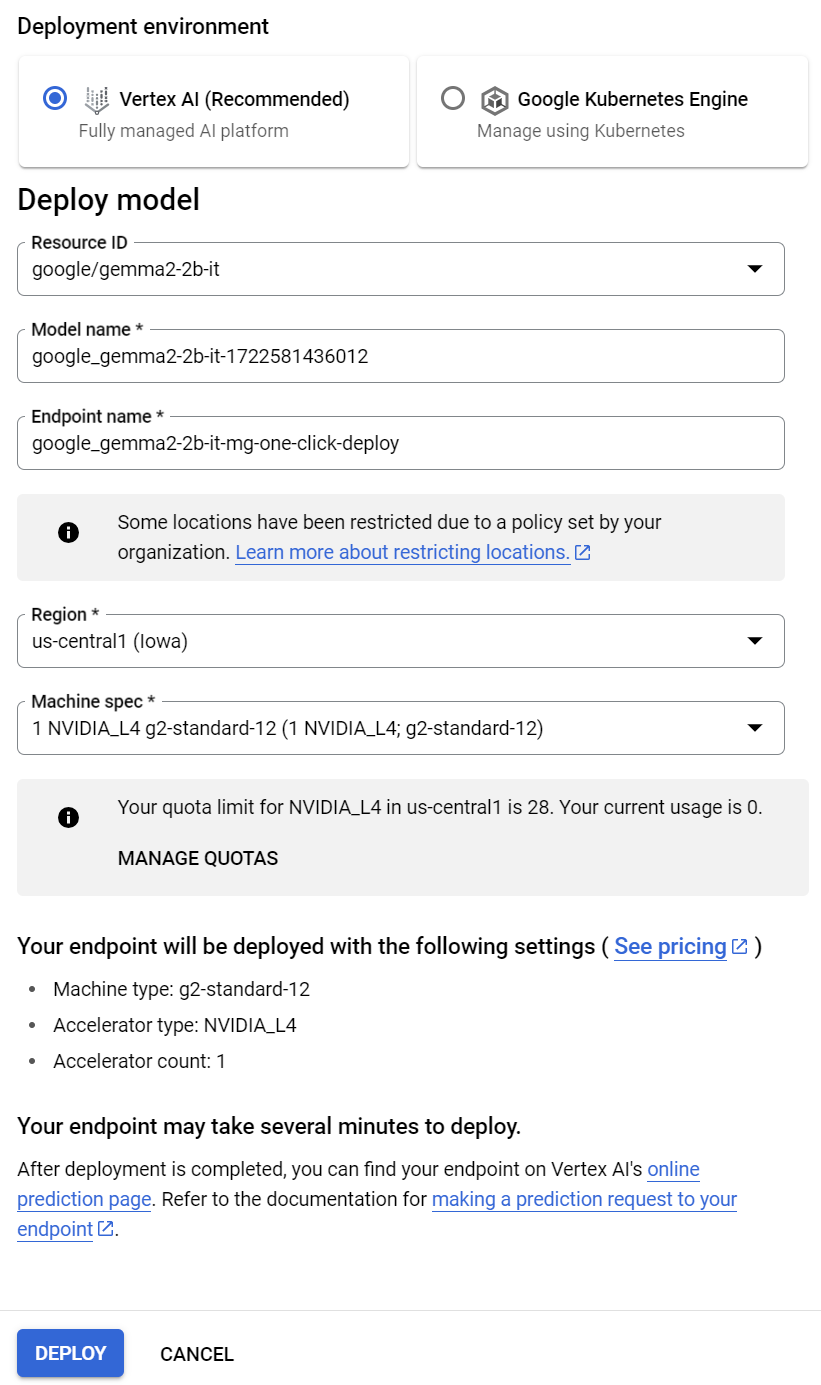

Once the deployment is completed, you can find your endpoint [here](https://pantheon.corp.google.com/vertex-ai/online-prediction).

To obtain a script for acquiring predictions from your active endpoint, navigate to the "Sample Request" and select "Python".

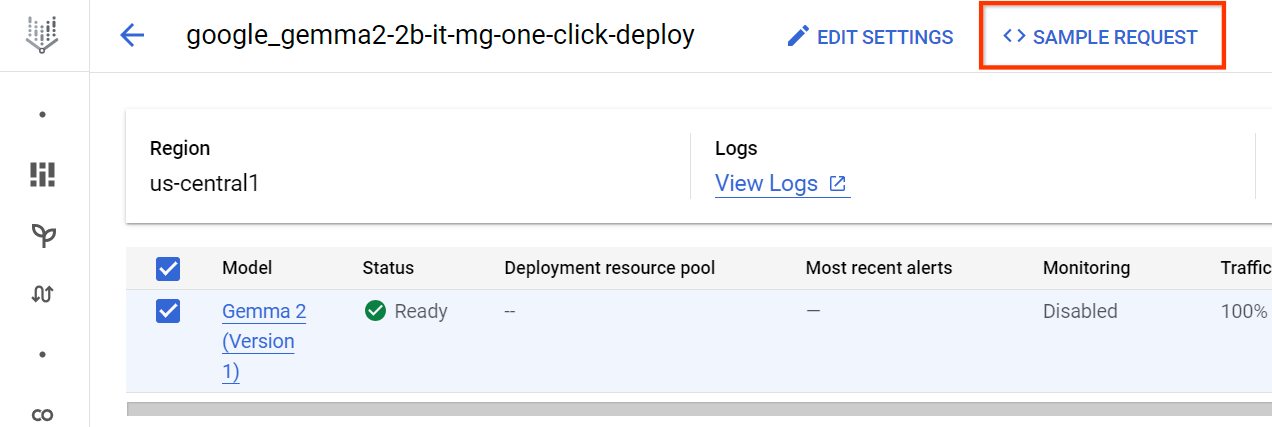

Authenticate using the Google Cloud SDK

In [ ]:
!gcloud auth application-default login

Below is the sample code on Github:\
https://github.com/googleapis/python-aiplatform/blob/main/samples/snippets/prediction_service/predict_custom_trained_model_sample.py

In [ ]:
# Copyright 2020 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# [START aiplatform_predict_custom_trained_model_sample]
from typing import Dict, List, Union

from google.cloud import aiplatform
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value


def predict_custom_trained_model_sample(
    project: str,
    endpoint_id: str,
    instances: Union[Dict, List[Dict]],
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    """
    `instances` can be either single instance of type dict or a list
    of instances.
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)
    # The format of each instance should conform to the deployed model's prediction input schema.
    instances = instances if isinstance(instances, list) else [instances]
    instances = [
        json_format.ParseDict(instance_dict, Value()) for instance_dict in instances
    ]
    parameters_dict = {}
    parameters = json_format.ParseDict(parameters_dict, Value())
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances, parameters=parameters
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # The predictions are a google.protobuf.Value representation of the model's predictions.
    prediction = response.predictions
    return prediction


# [END aiplatform_predict_custom_trained_model_sample]

Execute your request in Python

In [ ]:
YOUR_PROJECT_ID = "<YOUR_PROJECT_ID>"
YOUR_ENDPOINT_ID = "<YOUR_ENDPOINT_ID>"
YOUR_LOCATION = "<YOUR_LOCATION>"

prompt = "It was a dark and stormy night."

response = predict_custom_trained_model_sample(
    project=YOUR_PROJECT_ID,
    endpoint_id=YOUR_ENDPOINT_ID,
    location=YOUR_LOCATION,
    api_endpoint=f"{YOUR_LOCATION}-aiplatform.googleapis.com",
    instances={ "inputs": prompt, "max_tokens": 2048 }
)

print("-"*80)
print("Prediction Result")
print("-"*80)
print(response[0])

/usr/local/lib/python3.10/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


response
 deployed_model_id: 7748004453751455744
--------------------------------------------------------------------------------
Prediction Result
--------------------------------------------------------------------------------
  Suddenly, a flash of lightning illuminated the street, revealing a figure standing before my window.  It was a man dressed in a long coat, his face obscured by a wide-brimmed hat.  He held a lantern, the flames dancing in the wind, casting unnatural shadows around him. 

My heart pounded in my chest.  I knew this was no ordinary visitor.  Something about his presence sent shivers down my spine.  I couldn't help but stare, mesmerized by his strange aura.  He didn't seem aggressive, but there was an undeniable power about him.

Then, he spoke.  His voice, low and raspy, seemed to echo from the depths of the storm.  "I'm looking for a book," he said, his words barely audible above the roaring wind.  "A book of forgotten magic."

He handed me a crumpled piece of 